TODO:
 * precompute $\log|\Sigma_i|$
 * precomute swapped indices for parameter updates

In [12]:
using Distributions
using StatPlots
using Plots
pyplot()

import CSV
import JLD2

In [13]:
include("src/NGSIM.jl")

chmm_em! (generic function with 1 method)

In [14]:
DATA_PATH = "../data/trajdata_i101_trajectories-0750am-0805am"
JLD2.@load joinpath(DATA_PATH, "td.jld") td

(S, id_lookup) = td_sparse(td)

X_full = CSV.read(joinpath(DATA_PATH, "X.csv"); nullable=false)
X = Array(X_full[:, [:velocity, :heading]])'
V = [X[1, :] .* sin.(X[2, :]) X[1, :] .* cos.(X[2, :])]'

(pairs, _) = readcsv(joinpath(DATA_PATH, "pairs.csv"), Int; header=true)
pairs = pairs'
;

In [4]:
plot(
    plot(X[1, :], seriestype=:density, title="velocity"),
    plot(X[2, :], seriestype=:density, title="heading"), 
    legend=:false, layout=(2, 1))

 instead.
  likely near C:\Users\Hamza El-Saawy\.julia\v0.6\IJulia\src\kernel.jl:31


LoadError: [91mUndefVarError: X not defined[39m

In [5]:
plot(
    plot(V[2, :], seriestype=:density, title="y velocity"), 
    plot(V[1, :], seriestype=:density, title="x velocity"),
    legend=:false, layout=(2, 1))

LoadError: [91mUndefVarError: V not defined[39m

## EM

In [15]:
K = 3
curr = chmm_from_data(V, K)
suff = ChmmSuffStats(curr)
;


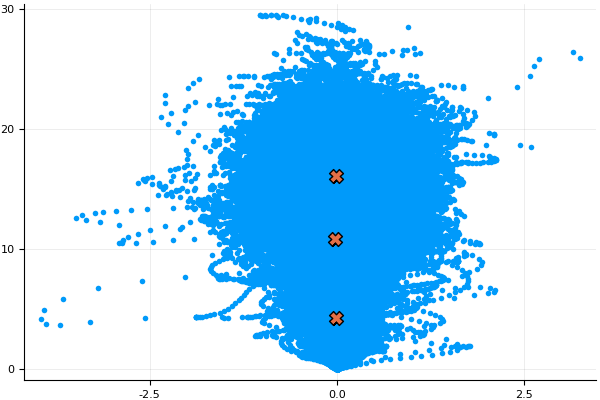

In [7]:
ms = hcat(curr.μs...)'
scatter(V[1, :], V[2, :], label="", marker=(:circle, stroke(0)))
scatter!(ms[:,1], ms[:, 2], marker=:X, ms=10, legend=false)

In [8]:
(curr, log_like_hist) = chmm_em!(S, V, pairs, K, curr, suff; N_iters=50, print_every=10)
;

iteration     10:  -6218015.482
iteration     20:  -6218953.847
iteration     30:  -6218992.580
iteration     40:  -6218979.256
iteration     50:  -6218972.800



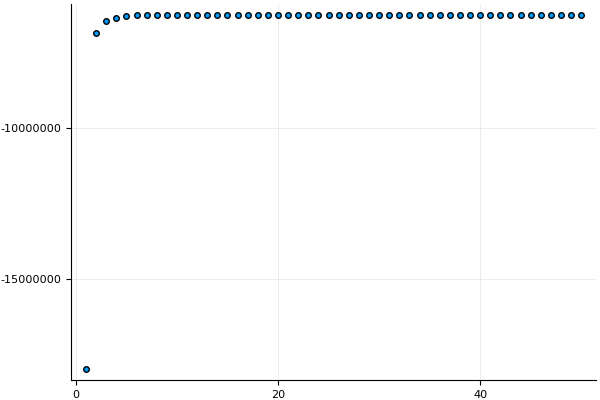

In [9]:
scatter(log_like_hist, legend=false)

# Analysis (????)


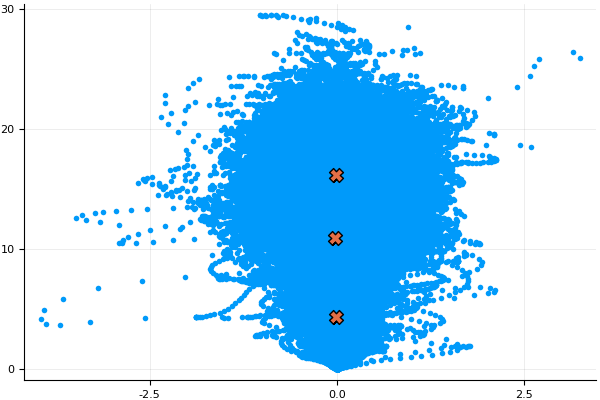

In [77]:
ms = hcat(curr.μs...)'
scatter(V[1, :], V[2, :], label="", marker=(:circle, stroke(0)))
scatter!(ms[:,1], ms[:, 2], marker=:X, ms=10, legend=false)

In [56]:
default_cgrad(:cmocean, default=:deep)

true


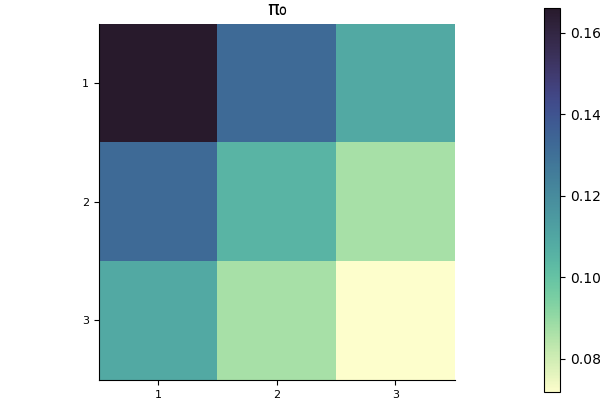

In [74]:
l = map(string, 1:3)
heatmap(l, l, reshape(curr.π0, 3, 3), aspect_ratio=1, title="π₀")
yaxis!(:flip)


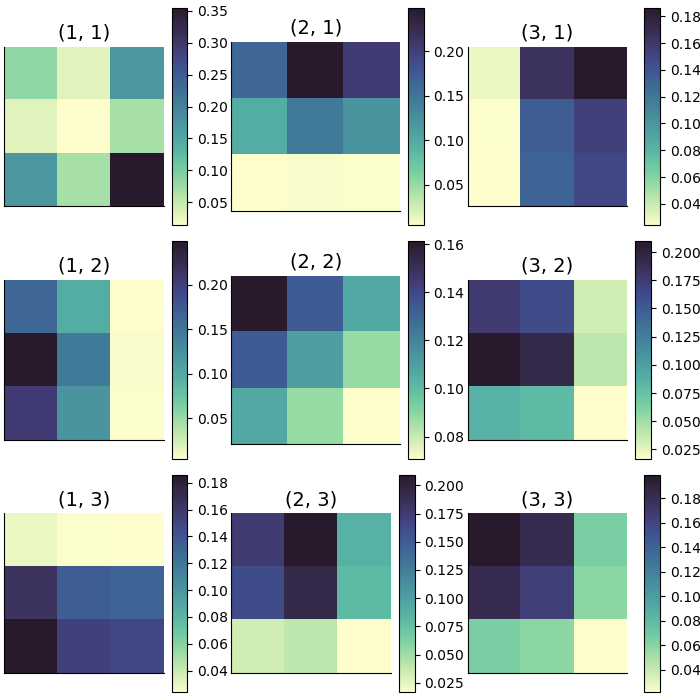

In [76]:
ps = Matrix(K, K)
for i in 1:K
    for j in 1:K
        k = sub2ind((K, K), i, j)
        p = reshape(curr.P[:, k], K, K)
        ps[i,j] = heatmap(l, l, p, title="($i, $j)" )
    end
end
plot(ps..., aspect_ratio=1, palette=:deep, colorbar=true, size=(700, 700))
yaxis!(:flip, ticks=0)